# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
from pathlib import Path
import os

In [2]:
load_dotenv()  # Load environment variables from .env file
PARENT = Path(os.getcwd()).parent

DATA_DIR_PROCESSED = Path(os.getenv("DATA_DIR_PROCESSED"))
DATA_DIR_PROCESSED = PARENT / DATA_DIR_PROCESSED

In [4]:
df = pd.read_csv(DATA_DIR_PROCESSED / "1-loan_data_winsorized.csv")
df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   credit_policy          9578 non-null   int64  
 1   purpose                9578 non-null   object 
 2   interest_rate          9578 non-null   float64
 3   installment            9578 non-null   float64
 4   log_annual_income      9578 non-null   float64
 5   debt_income_ratio      9578 non-null   float64
 6   fico                   9578 non-null   int64  
 7   days_with_credit_line  9578 non-null   float64
 8   revolve_balance        9578 non-null   int64  
 9   revolve_utilized       9578 non-null   float64
 10  inquiries_last_6_mon   9578 non-null   int64  
 11  delinquent_2_yrs       9578 non-null   int64  
 12  public_recs            9578 non-null   int64  
 13  default                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

In [6]:
df.describe()

,credit_policy,interest_rate,installment,log_annual_income,debt_income_ratio,fico,days_with_credit_line,revolve_balance,revolve_utilized,inquiries_last_6_mon,delinquent_2_yrs,public_recs,default
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122540,318.908239,10.927845,12.589650,710.846314,4548.628750,1.691396e+04,46.781498,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026572,206.573372,0.600864,6.847211,37.970537,2450.586334,3.375619e+04,28.980569,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.188600,870.390000,12.484574,26.242300,827.000000,12930.009584,1.207359e+06,98.923000,33.000000,13.000000,5.000000,1.000000


In [10]:
# Unique values in credit_policy, purpose, and default
print('Unique values in credit_policy:', df['credit_policy'].value_counts())
print('--------------------------------------------')
print('Unique values in purpose:', df['purpose'].value_counts())
print('--------------------------------------------')
print('Unique values in default:', df['default'].value_counts())

Unique values in credit_policy: credit_policy
1    7710
0    1868
Name: count, dtype: int64
--------------------------------------------
Unique values in purpose: purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64
--------------------------------------------
Unique values in default: default
0    8045
1    1533
Name: count, dtype: int64


In [9]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

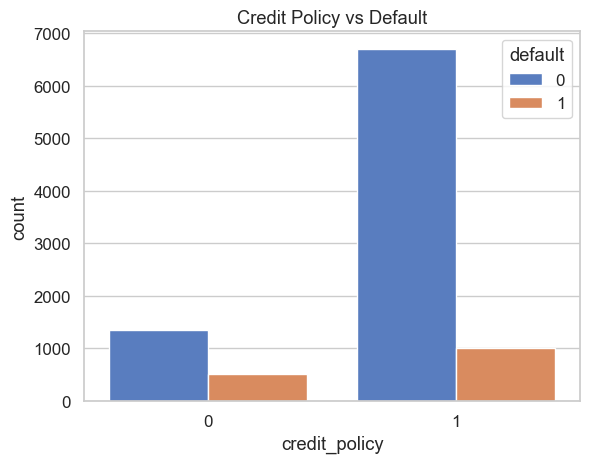

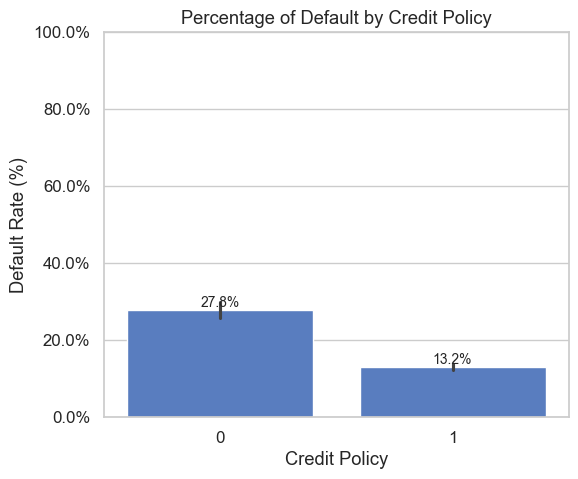

In [34]:
# Credit policy
ax = sns.countplot(x='credit_policy', data=df, hue='default')
# Add percentages
total = len(df)
plt.title("Credit Policy vs Default")
plt.show()

plt.figure(figsize=(6,5))
ax = sns.barplot(x='credit_policy', y='default', data=df)
plt.ylabel("Default Rate (%)")
plt.xlabel("Credit Policy")
plt.title("Percentage of Default by Credit Policy")
plt.ylim(0, 1)  # proportion scale
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.1f}%'))

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%',          # convert to %
                (p.get_x() + p.get_width()/2., height), 
                ha='center', va='bottom', fontsize=10)

plt.show()


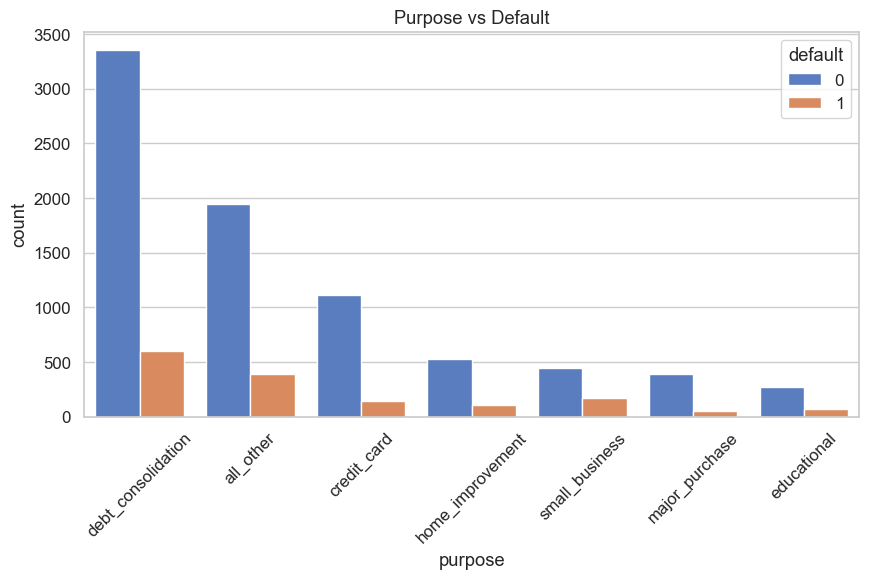

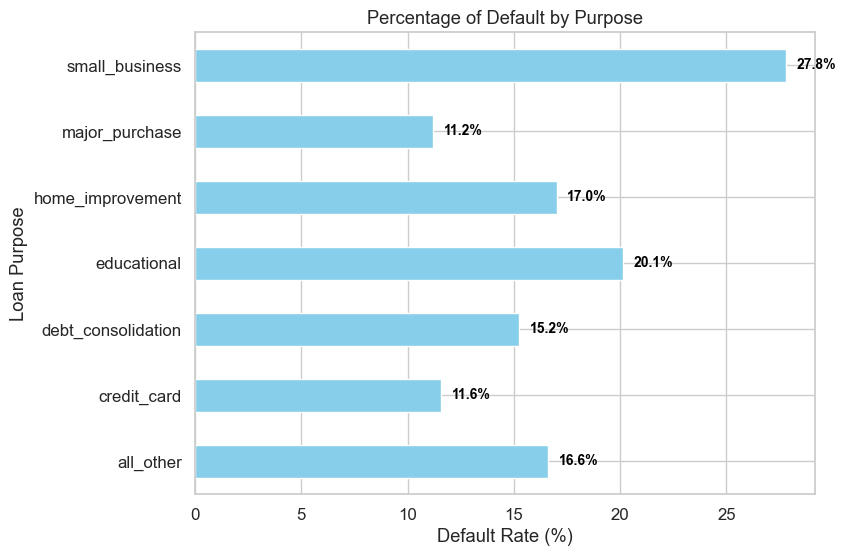

In [33]:
# Purpose
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index, hue='default')
plt.title("Purpose vs Default")
plt.xticks(rotation=45)
plt.show()

# Calculate default rate per purpose
default_rate = df.groupby('purpose')['default'].mean() * 100  # percentage
ax = default_rate.plot(kind='barh', color='skyblue', figsize=(8,6))
plt.xlabel("Default Rate (%)")
plt.ylabel("Loan Purpose")
plt.title("Percentage of Default by Purpose")

# Add values at the end of bars with custom color
for i, v in enumerate(default_rate):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center', color='black', fontsize=10, fontweight='bold')

plt.show()

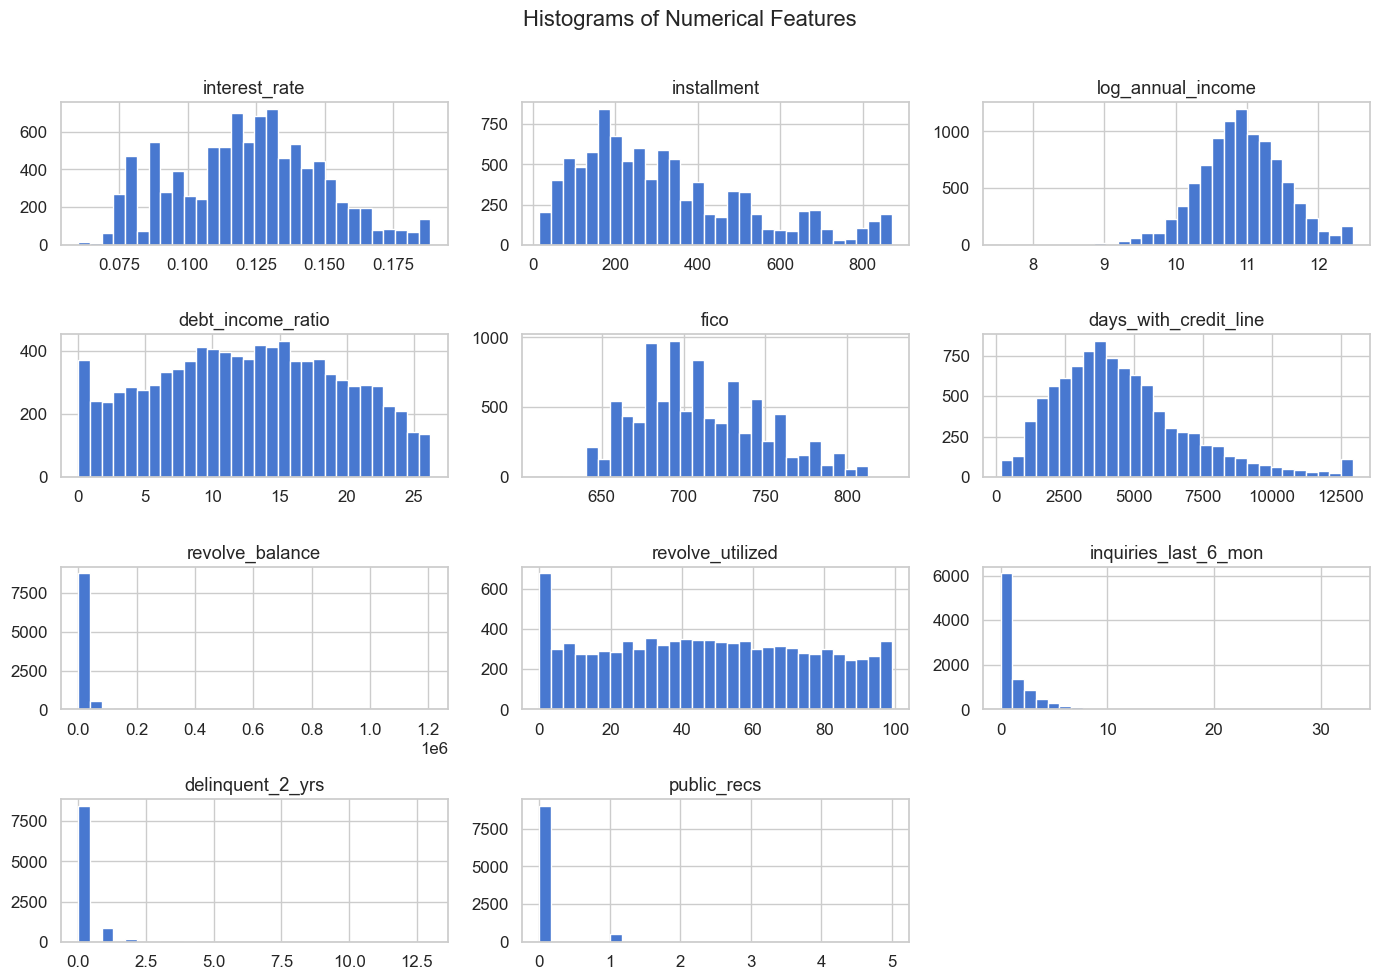

In [19]:
num_cols = ['interest_rate', 'installment', 'log_annual_income', 'debt_income_ratio', 'fico', 'days_with_credit_line', 'revolve_balance', 'revolve_utilized', 'inquiries_last_6_mon', 'delinquent_2_yrs', 'public_recs']

# Histograms
df[num_cols].hist(figsize=(14,10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


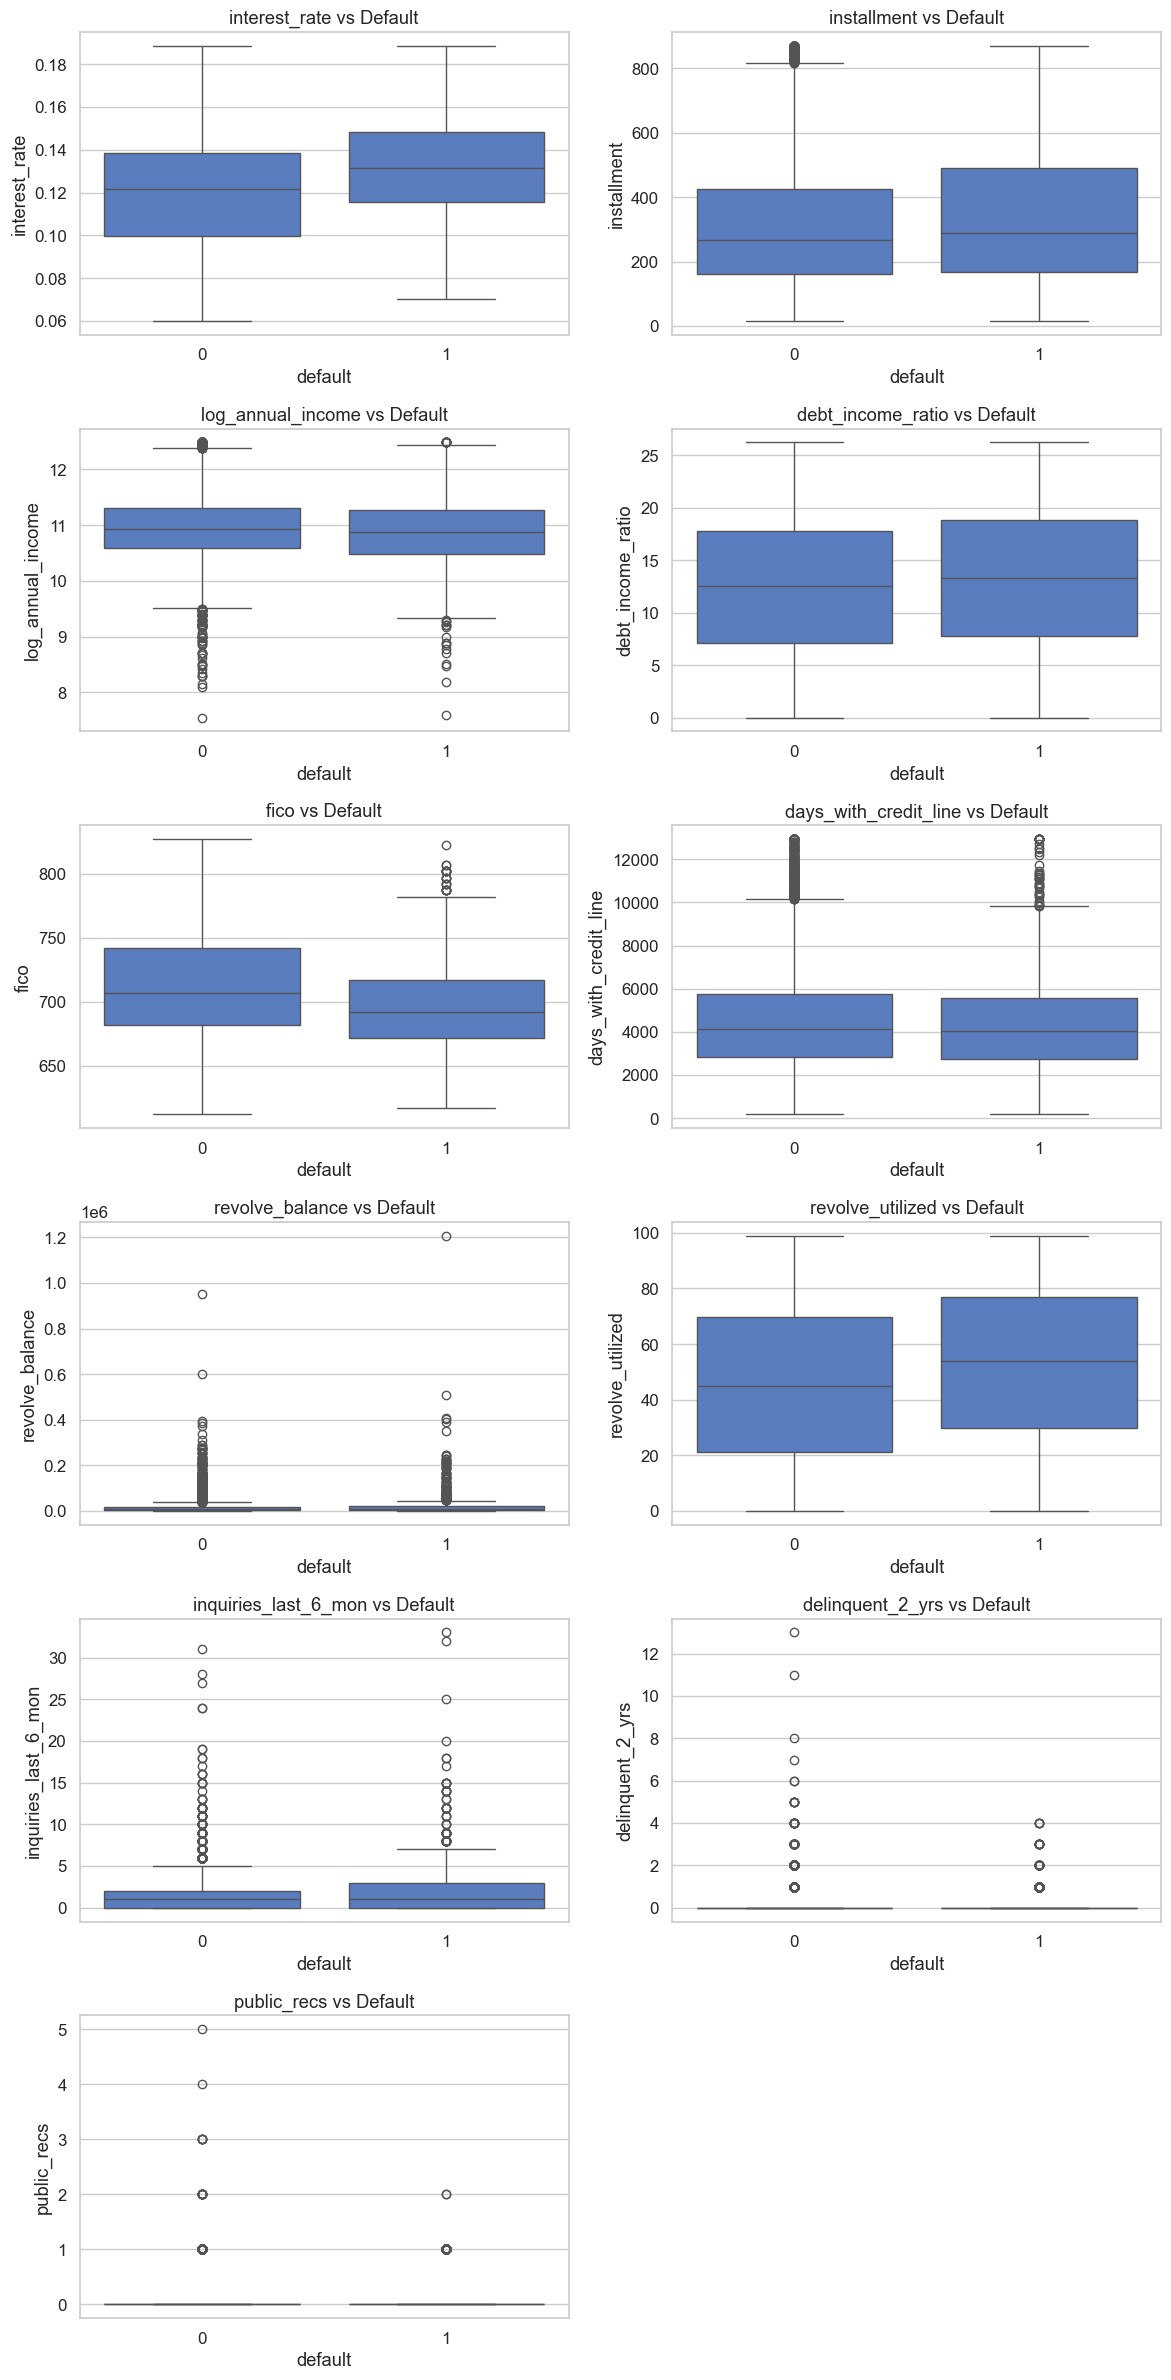

In [25]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24))  # 6 rows, 2 cols
axes = axes.flatten()  # make it easier to index

for i, col in enumerate(num_cols):
    sns.boxplot(x='default', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Default")

# Hide the unused subplot (12th box)
if len(num_cols) < len(axes):
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


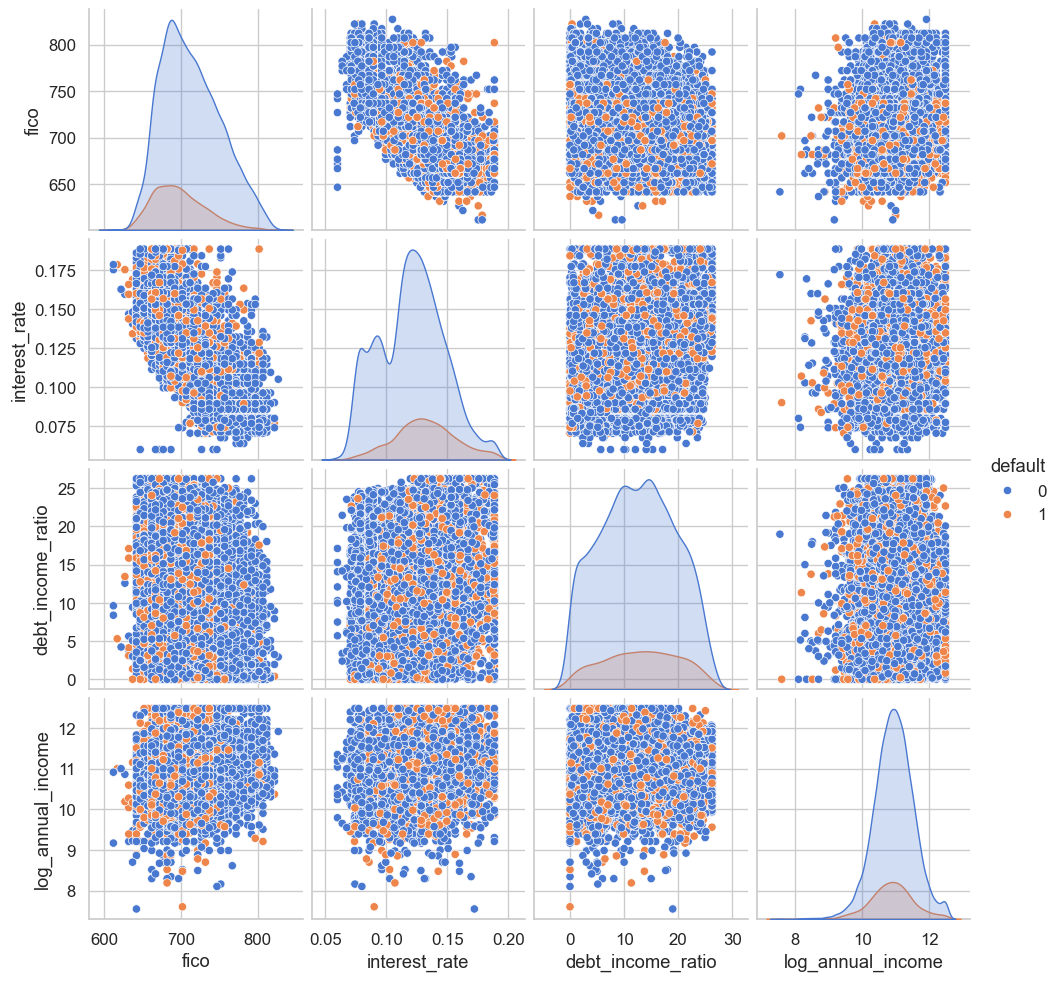

In [15]:
# Pairplot for key variables
sns.pairplot(df[['fico','interest_rate','debt_income_ratio','log_annual_income','default']], hue='default')
plt.show()

No visible relationships

### Correlation

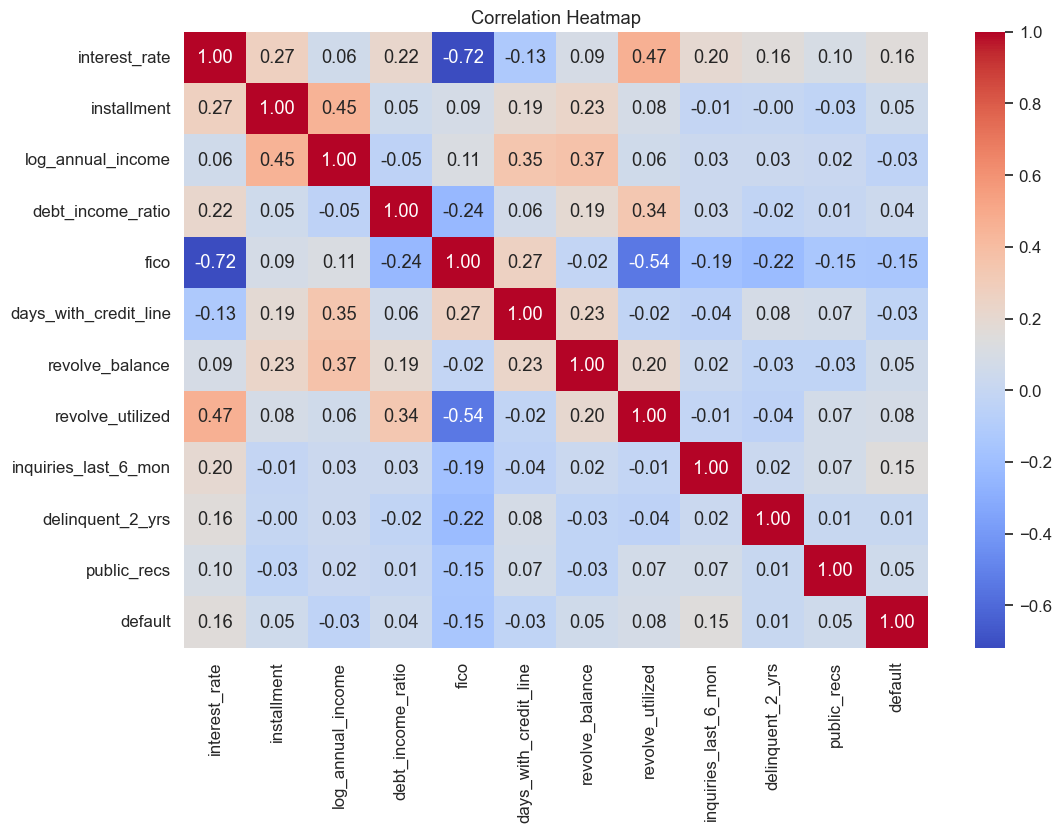

In [36]:
# Correlation heatmap
corr_cols = num_cols + ['default']

plt.figure(figsize=(12,8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()